In [991]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [992]:
df =pd.read_csv("AmesHousing.csv")

In [993]:
df.columns
Y = df[["SalePrice"]]

In [994]:
df.isna().sum()/len(df)

Order             0.000000
PID               0.000000
MS SubClass       0.000000
MS Zoning         0.000000
Lot Frontage      0.167235
                    ...   
Mo Sold           0.000000
Yr Sold           0.000000
Sale Type         0.000000
Sale Condition    0.000000
SalePrice         0.000000
Length: 82, dtype: float64

In [995]:
col = [var for var in df.columns if df[var].isna().sum()/len(df)>0.0]
col

['Lot Frontage',
 'Alley',
 'Mas Vnr Type',
 'Mas Vnr Area',
 'Bsmt Qual',
 'Bsmt Cond',
 'Bsmt Exposure',
 'BsmtFin Type 1',
 'BsmtFin SF 1',
 'BsmtFin Type 2',
 'BsmtFin SF 2',
 'Bsmt Unf SF',
 'Total Bsmt SF',
 'Electrical',
 'Bsmt Full Bath',
 'Bsmt Half Bath',
 'Fireplace Qu',
 'Garage Type',
 'Garage Yr Blt',
 'Garage Finish',
 'Garage Cars',
 'Garage Area',
 'Garage Qual',
 'Garage Cond',
 'Pool QC',
 'Fence',
 'Misc Feature']

In [996]:
df =df[col]

In [997]:
100*(df.isna().sum()/len(df))

Lot Frontage      16.723549
Alley             93.242321
Mas Vnr Type      60.580205
Mas Vnr Area       0.784983
Bsmt Qual          2.730375
Bsmt Cond          2.730375
Bsmt Exposure      2.832765
BsmtFin Type 1     2.730375
BsmtFin SF 1       0.034130
BsmtFin Type 2     2.764505
BsmtFin SF 2       0.034130
Bsmt Unf SF        0.034130
Total Bsmt SF      0.034130
Electrical         0.034130
Bsmt Full Bath     0.068259
Bsmt Half Bath     0.068259
Fireplace Qu      48.532423
Garage Type        5.358362
Garage Yr Blt      5.426621
Garage Finish      5.426621
Garage Cars        0.034130
Garage Area        0.034130
Garage Qual        5.426621
Garage Cond        5.426621
Pool QC           99.556314
Fence             80.477816
Misc Feature      96.382253
dtype: float64

In [998]:
col = [var for var in df.columns if 100*(df[var].isna().sum()/len(df))<30.00 ]
col

['Lot Frontage',
 'Mas Vnr Area',
 'Bsmt Qual',
 'Bsmt Cond',
 'Bsmt Exposure',
 'BsmtFin Type 1',
 'BsmtFin SF 1',
 'BsmtFin Type 2',
 'BsmtFin SF 2',
 'Bsmt Unf SF',
 'Total Bsmt SF',
 'Electrical',
 'Bsmt Full Bath',
 'Bsmt Half Bath',
 'Garage Type',
 'Garage Yr Blt',
 'Garage Finish',
 'Garage Cars',
 'Garage Area',
 'Garage Qual',
 'Garage Cond']

In [999]:
df = df[col]

In [1000]:
df = df[['Lot Frontage','Mas Vnr Area']]

In [1001]:
df

,Lot Frontage,Mas Vnr Area
0,141.0,112.0
1,80.0,0.0
2,81.0,108.0
3,93.0,0.0
4,74.0,0.0
...,...,...
2925,37.0,0.0
2926,NaN,0.0
2927,62.0,0.0
2928,77.0,0.0


In [1002]:
(df.isna().sum()/len(df))*100

Lot Frontage    16.723549
Mas Vnr Area     0.784983
dtype: float64

In [1003]:
df = df[['Lot Frontage','Mas Vnr Area']]
df

,Lot Frontage,Mas Vnr Area
0,141.0,112.0
1,80.0,0.0
2,81.0,108.0
3,93.0,0.0
4,74.0,0.0
...,...,...
2925,37.0,0.0
2926,NaN,0.0
2927,62.0,0.0
2928,77.0,0.0


In [1004]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df,Y,train_size = 0.25,random_state = 0)

In [1005]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
si1 = SimpleImputer(strategy='mean')
si2 = SimpleImputer(strategy='median')
clf = ColumnTransformer(
    [('Mean_lot_frt',si1,[0]),
    ( 'Medain_mas_vnr',si2,[1])],remainder='passthrough'
)
clf.fit(X_train).named_transformers_


{'Mean_lot_frt': SimpleImputer(),
 'Medain_mas_vnr': SimpleImputer(strategy='median')}

In [1006]:
clf.named_transformers_['Mean_lot_frt'].statistics_
clf.named_transformers_['Medain_mas_vnr'].statistics_

array([0.])

In [1007]:
X_train_trf = clf.transform(X_train)                
X_test_trf = clf.transform(X_test)                

In [1008]:

X_test_trf
X_train_trf

array([[  80.,  203.],
       [  39.,    0.],
       [  60.,    0.],
       ...,
       [  80.,   96.],
       [  85., 1047.],
       [  75.,    0.]], shape=(732, 2))

In [ ]:
tf = np.concat([X_train_trf,X_test_trf])

In [1010]:
trf = pd.DataFrame(tf,columns=['Mean_lot_frt','Medain_mas_vnr'])
trf

,Mean_lot_frt,Medain_mas_vnr
0,80.000000,203.0
1,39.000000,0.0
2,60.000000,0.0
3,69.764803,164.0
4,98.000000,0.0
...,...,...
2925,65.000000,214.0
2926,66.000000,0.0
2927,69.764803,302.0
2928,110.000000,726.0


In [1011]:
df

,Lot Frontage,Mas Vnr Area
0,141.0,112.0
1,80.0,0.0
2,81.0,108.0
3,93.0,0.0
4,74.0,0.0
...,...,...
2925,37.0,0.0
2926,NaN,0.0
2927,62.0,0.0
2928,77.0,0.0


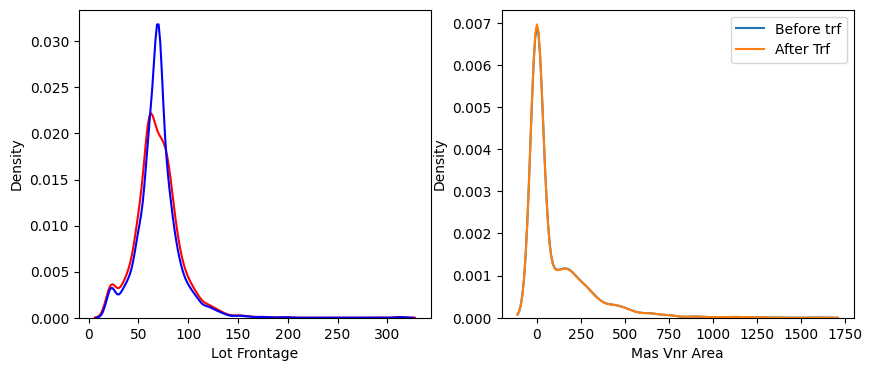

In [1012]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize = (10,4))
sns.kdeplot(df["Lot Frontage"],ax=ax1,label='Before trf',color='red')
sns.kdeplot(trf["Mean_lot_frt"],ax=ax1,label='After Trf',color='blue')
sns.kdeplot(df["Mas Vnr Area"],ax=ax2,label='Before trf')
sns.kdeplot(trf["Medain_mas_vnr"],ax=ax2,label='After Trf')
plt.legend()

<Axes: >

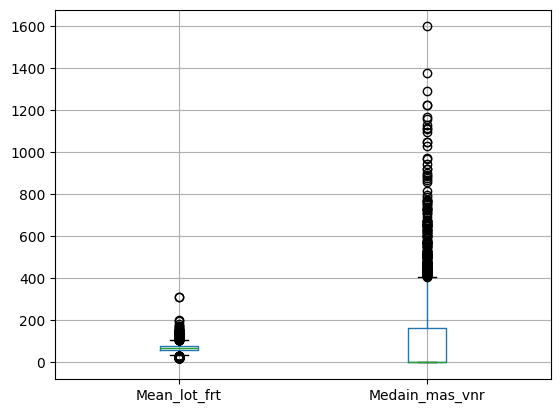

In [1013]:
trf[["Mean_lot_frt","Medain_mas_vnr"]].boxplot()

<Axes: >

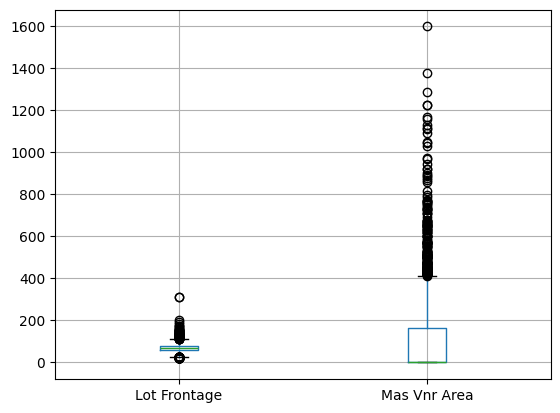

In [1014]:
df[["Lot Frontage","Mas Vnr Area"]].boxplot()

In [1015]:
df.cov()

,Lot Frontage,Mas Vnr Area
Lot Frontage,545.938878,935.524977
Mas Vnr Area,935.524977,32081.327268


In [1016]:
df.corr()

,Lot Frontage,Mas Vnr Area
Lot Frontage,1.000000,0.222407
Mas Vnr Area,0.222407,1.000000
